In [25]:
from numberplate_extractor.plate_extractor import PlateExtractor
from numberplate_extractor.processing_pipeline import ProcessingPipeline
from PIL import Image
import matplotlib.pyplot as plt

In [26]:
plate_extractor = PlateExtractor()
processing_pipeline = ProcessingPipeline()

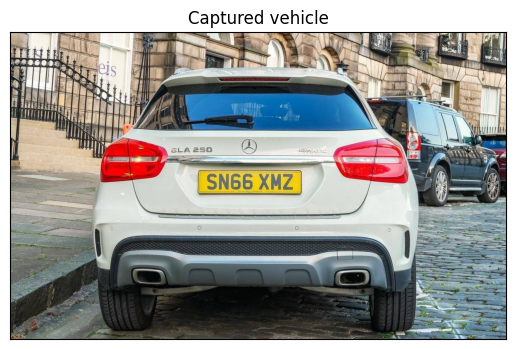

In [27]:
# Read image in
image = Image.open('example_data/test_1.png')

plt.imshow(image)
plt.title("Captured vehicle")
plt.xticks([])
plt.yticks([])
plt.show()

In [28]:
# Get bounding box coordinates of plate
numberplate_prediction = plate_extractor.make_prediction(image)
xmin, ymin, xmax, ymax = plate_extractor.get_bounding_box(numberplate_prediction)

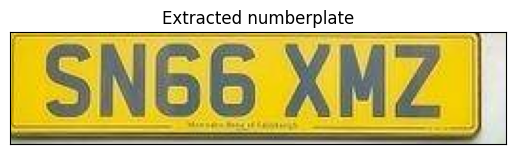

In [29]:
# Crop the numberplate from the original image
numberplate = processing_pipeline.crop_numberplate_from_original(image, xmin, ymin, xmax, ymax)

plt.imshow(numberplate)
plt.title("Extracted numberplate")
plt.xticks([])
plt.yticks([])
plt.show()

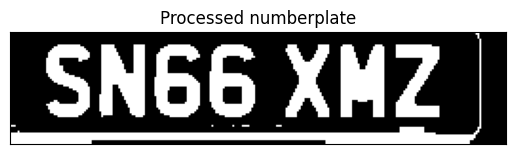

In [30]:
# Apply the preprocessing pipeline and find contours of characters
processed_numberplate = processing_pipeline.apply_pipeline(numberplate)
contours = processing_pipeline.find_sorted_contours(processed_numberplate)

plt.imshow(processed_numberplate, cmap='gray')
plt.title("Processed numberplate")
plt.xticks([])
plt.yticks([])
plt.show()

In [31]:
#Extract the numberplate string
height, width = numberplate.shape[:2]
numberplate_string = plate_extractor.extract_chars(width, height, contours, numberplate)

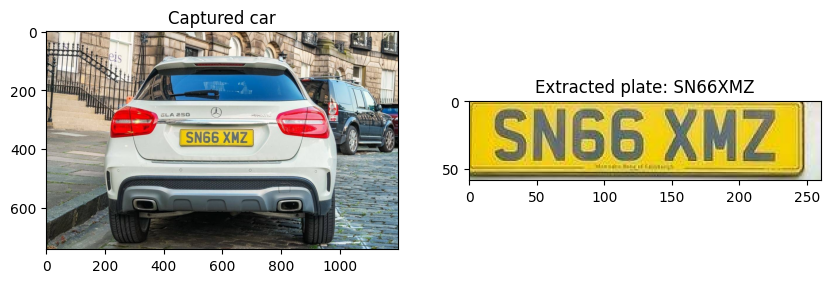

In [32]:
# Plot original and output
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image)
axes[0].set_title("Captured car")

axes[1].imshow(numberplate)
axes[1].set_title(f"Extracted plate: {numberplate_string}")

plt.show()